In [1]:
from analysis import *

In [2]:
followers_analysis_json = {}

In [3]:
loaded_json = analysis.universal_data_loader('../../data/followers_timeline/')

In [4]:
print(len(loaded_json[1]))

1


In [5]:
all_tweets = analysis.create_tweet_list_from_loaded_json(loaded_json)

In [6]:
# Search for words in all tweets
tweets_with_search_words, suspicious_tweet_count, total_tweets_count, suspicious_words_in_tweets = analysis.search_for_words(all_tweets, analysis.bad_word_list) 

In [7]:
print(len(tweets_with_search_words))
analysis.print_tweet(tweets_with_search_words[0])

113175
{
    "id": "1464987434530361344",
    "text": "RT @justAlesh: 1/2 Here are some facts about @Luxaiart after the release:\n\n\ud83d\udc8e1.25 $SOL floor price\n\ud83d\udc8e220 $SOL total volume\n\ud83d\udc8e2.67 $SOL avg pri\u2026",
    "suspicious_word": [
        "price"
    ]
}


In [8]:
print("Total number of tweets: {}".format(total_tweets_count))
print("Total number of tweets with search words: {}".format(suspicious_tweet_count))
print("Suspicious words: {}".format(suspicious_words_in_tweets))

Total number of tweets: 899573
Total number of tweets with search words: 113175
Suspicious words: {'trophy': 249, 'skinfur': 0, 'dragon': 1645, 'pelt': 70, 'tusk': 117, 'ivory': 792, 'scale': 998, 'taxidermy': 338, 'rug': 3620, 'hide': 520, 'bone': 1688, 'meat': 679, 'delicacy': 18, 'medicine': 351, 'live': 19821, 'pangolin': 25, 'leopard': 183, 'rhino': 191, 'sungazer': 0, 'lizard': 83, 'crocodile': 109, 'alligator': 56, 'parrot': 152, 'snake': 480, 'python': 54, 'yellow material': 0, 'white plastic': 11, 'jelly': 287, 'aloo': 253, 'kola': 178, 'australian teddy bear': 0, 'stripped t-shirt': 0, 'four wheeler': 1, 'antique': 51666, 'mammoth': 105, 'carved': 2040, 'sale': 31391, 'selling': 3009, 'price': 6133, 'xiangya': 0, 'african material': 0, 'ANTEBELLUMELEG1': 0}


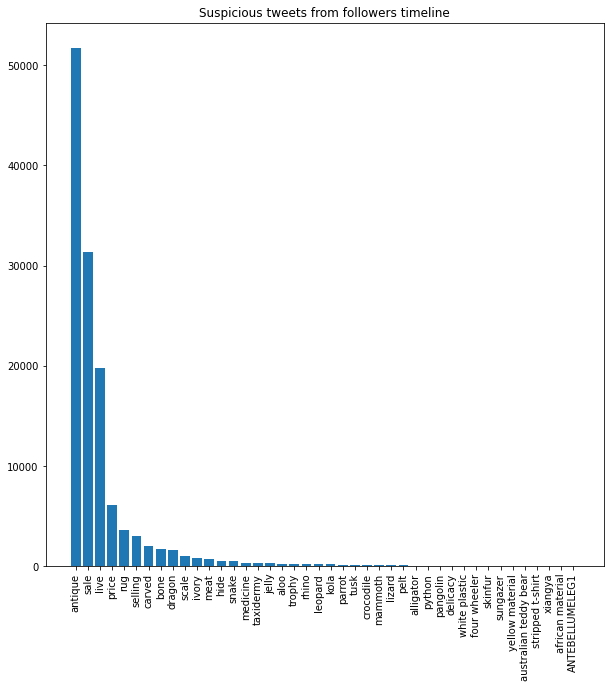

In [9]:
# Sort suspicious_tweets_word_count
suspicious_tweets_word_count_sorted = sorted(suspicious_words_in_tweets.items(), key=operator.itemgetter(1), reverse=True)
# Remove the items with 0 count
# suspicious_tweets_word_count_sorted = [x for x in suspicious_tweets_word_count_sorted if x[1] > 0]
# Make a chart of suspicious_tweets_word_count_sorted with names of the search words in bar
# Make the chart wider
plt.figure(figsize=(10,10))
plt.bar(range(len(suspicious_tweets_word_count_sorted)), [x[1] for x in suspicious_tweets_word_count_sorted], align='center')
plt.xticks(range(len(suspicious_tweets_word_count_sorted)), [x[0] for x in suspicious_tweets_word_count_sorted], rotation=90)
plt.title("Suspicious tweets from followers timeline")
plt.show()

In [10]:
clean_tweets = analysis.clean_tweets(tweets_with_search_words)

[nltk_data] Downloading package stopwords to /home/gabe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gabe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/gabe/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [11]:
print(clean_tweets[0])

{'id': '1464987434530361344', 'text': 'rt justalesh fact luxaiart release 💎 sol floor price 💎 sol total volume 💎 sol avg pri…', 'suspicious_word': ['price']}


In [12]:
# Find the most common bigrams
all_bigrams = analysis.find_bigrams_from_tweets(clean_tweets) 
		

In [13]:
print(analysis.get_top_bigrams(all_bigrams, 10))

[(('th', 'century'), 2863), (('via', 'etsy'), 2530), (('antique', 'vintage'), 2435), (('antique', 'amp'), 2174), (('via', 'ebay'), 1641), (('fine', 'art'), 1552), (('vintage', 'antique'), 1233), (('amp', 'antique'), 1214), (('antique', 'fair'), 1145), (('antique', 'antique'), 1014)]


In [14]:
common_combinations_of_search_words = analysis.find_common_combinations_of_search_words(tweets_with_search_words, 2)

In [15]:
print(common_combinations_of_search_words)

[(['antique', 'sale'], 5189), (['live', 'sale'], 1106), (['antique', 'live'], 962), (['price', 'sale'], 677), (['antique', 'price'], 590), (['antique', 'carved'], 550), (['antique', 'selling'], 339), (['sale', 'selling'], 275), (['antique', 'bone'], 262), (['antique', 'rug'], 261), (['antique', 'live', 'sale'], 229), (['antique', 'ivory'], 153), (['antique', 'dragon'], 149), (['live', 'price'], 108), (['rug', 'sale'], 103), (['antique', 'carved', 'price'], 91), (['antique', 'price', 'sale'], 90), (['antique', 'scale'], 84), (['live', 'rug'], 83), (['antique', 'carved', 'sale'], 80), (['price', 'selling'], 73), (['antique', 'sale', 'selling'], 57), (['live', 'selling'], 54), (['carved', 'sale'], 49), (['price', 'rug'], 43), (['antique', 'taxidermy'], 42), (['ivory', 'mammoth'], 42), (['dragon', 'sale'], 40), (['dragon', 'hide'], 40), (['antique', 'snake'], 39), (['sale', 'scale'], 36), (['sale', 'taxidermy'], 36), (['bone', 'sale'], 29), (['carved', 'ivory'], 28), (['antique', 'rug', 's

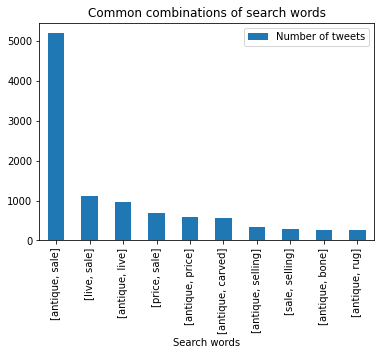

In [16]:
analysis.create_bar_chart(common_combinations_of_search_words, 10, "Search words", "Number of tweets", "Common combinations of search words")

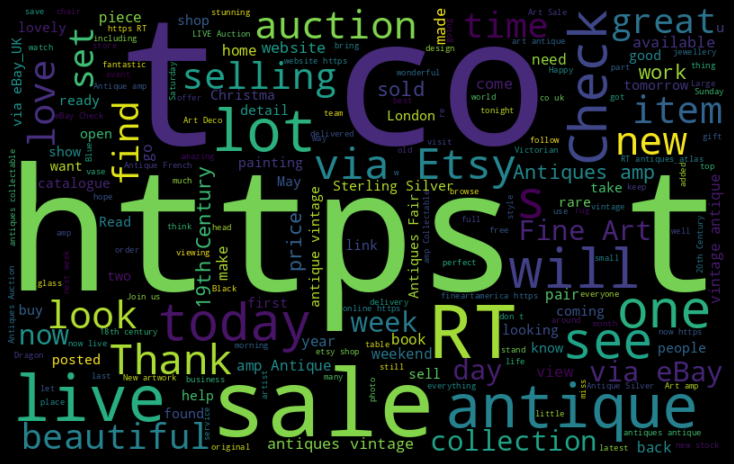

In [17]:
analysis.create_word_cloud(tweets_with_search_words)

In [14]:
print(analysis.get_most_common_words(clean_tweets))

[('antique', 43644), ('rt', 25168), ('sale', 25168), ('amp', 16562), ('auction', 12977), ('vintage', 11778), ('th', 10433), ('art', 9656), ('live', 9191), ('via', 8004), ('new', 7265), ('silver', 5797), ('day', 5302), ('today', 5265), ('price', 5261), ('lot', 5253), ('£', 5233), ('etsy', 5132), ('check', 5057), ('online', 4677), ('u', 4525), ('ebay', 4496), ('one', 3630), ('great', 3607), ('pm', 3470), ('item', 3455), ('fair', 3375), ('furniture', 3361), ('see', 3357), ('shop', 3296), ('century', 3296), ('fine', 3219), ('get', 3144), ('free', 3047), ('interior', 3040), ('am', 2957), ('week', 2921), ('home', 2902), ('available', 2837), ('collectable', 2804), ('catalogue', 2761), ('time', 2708), ('selling', 2649), ('beautiful', 2634), ('good', 2613), ('gold', 2611), ('watch', 2565), ('jewellery', 2548), ('open', 2511), ('s', 2476), ('look', 2445), ('painting', 2427), ('next', 2425), ('view', 2405), ('table', 2390), ('bid', 2387), ('website', 2377), ('set', 2361), ('life', 2345), ('year',

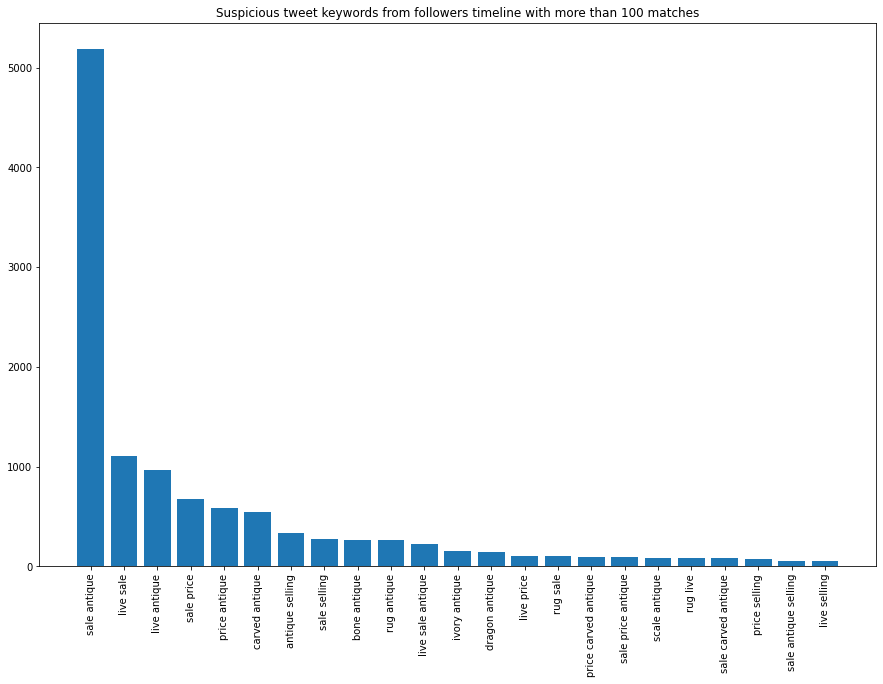

In [ ]:
# Remove items with 1 count
suspicious_tweets_word_map_sorted = [x for x in suspicious_tweets_word_map_sorted if x[1] > 50]
plt.figure(figsize=(15,10))
plt.bar(range(len(suspicious_tweets_word_map_sorted)), [x[1] for x in suspicious_tweets_word_map_sorted], align='center')
plt.xticks(range(len(suspicious_tweets_word_map_sorted)), [x[0] for x in suspicious_tweets_word_map_sorted], rotation=90)
plt.title("Suspicious tweet keywords from followers timeline with more than 100 matches")
plt.show()

In [ ]:
# Write user_analysis_json to json file
with open('../../data/followers_timeline_analysis.json', 'w') as outfile:
	json.dump(followers_analysis_json, outfile, indent=4)